In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time

# reading features list
data = pd.read_csv("kddcup99_csv.csv")
data.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label
0,0,tcp,http,SF,181,5450,0,0,0,0,...,9,1.0,0.0,0.11,0.0,0.0,0.0,0.0,0.0,normal
1,0,tcp,http,SF,239,486,0,0,0,0,...,19,1.0,0.0,0.05,0.0,0.0,0.0,0.0,0.0,normal
2,0,tcp,http,SF,235,1337,0,0,0,0,...,29,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,normal
3,0,tcp,http,SF,219,1337,0,0,0,0,...,39,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,normal
4,0,tcp,http,SF,217,2032,0,0,0,0,...,49,1.0,0.0,0.02,0.0,0.0,0.0,0.0,0.0,normal


In [ ]:
output = data['label'].values
labels = set(output)
print(labels)

{'rootkit', 'guess_passwd', 'multihop', 'spy', 'imap', 'ipsweep', 'pod', 'ftp_write', 'perl', 'back', 'teardrop', 'loadmodule', 'portsweep', 'warezclient', 'land', 'nmap', 'normal', 'buffer_overflow', 'neptune', 'phf', 'warezmaster', 'smurf', 'satan'}


In [ ]:
attacks_types = {
'normal': 'normal',
'back': 'dos',
'buffer_overflow': 'u2r',
'ftp_write': 'r2l',
'guess_passwd': 'r2l',
'imap': 'r2l',
'ipsweep': 'probe',
'land': 'dos',
'loadmodule': 'u2r',
'multihop': 'r2l',
'neptune': 'dos',
'nmap': 'probe',
'perl': 'u2r',
'phf': 'r2l',
'pod': 'dos',
'portsweep': 'probe',
'rootkit': 'u2r',
'satan': 'probe',
'smurf': 'dos',
'spy': 'r2l',
'teardrop': 'dos',
'warezclient': 'r2l',
'warezmaster': 'r2l'
}
data['Attack Type'] = data['label'].map(attacks_types)
data.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label,Attack Type
0,0,tcp,http,SF,181,5450,0,0,0,0,...,1.0,0.0,0.11,0.0,0.0,0.0,0.0,0.0,normal,normal
1,0,tcp,http,SF,239,486,0,0,0,0,...,1.0,0.0,0.05,0.0,0.0,0.0,0.0,0.0,normal,normal
2,0,tcp,http,SF,235,1337,0,0,0,0,...,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,normal,normal
3,0,tcp,http,SF,219,1337,0,0,0,0,...,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,normal,normal
4,0,tcp,http,SF,217,2032,0,0,0,0,...,1.0,0.0,0.02,0.0,0.0,0.0,0.0,0.0,normal,normal


In [ ]:
data.drop(columns = ['label'], inplace = True)


In [ ]:
print(len(data['protocol_type'].unique()), len(data['service'].unique()),len(data['flag'].unique()),len(data['land'].unique()),len(data['logged_in'].unique()),len(data['is_host_login'].unique()),len(data['is_guest_login'].unique()))

3 66 11 2 2 1 2


In [ ]:

data.service.value_counts().to_dict()

{'ecr_i': 281400,
 'private': 110893,
 'http': 64292,
 'smtp': 9723,
 'other': 7237,
 'domain_u': 5863,
 'ftp_data': 4721,
 'eco_i': 1642,
 'ftp': 798,
 'finger': 670,
 'urp_i': 538,
 'telnet': 513,
 'ntp_u': 380,
 'auth': 328,
 'pop_3': 202,
 'time': 157,
 'csnet_ns': 126,
 'remote_job': 120,
 'gopher': 117,
 'imap4': 117,
 'discard': 116,
 'domain': 116,
 'iso_tsap': 115,
 'systat': 115,
 'shell': 112,
 'echo': 112,
 'rje': 111,
 'whois': 110,
 'sql_net': 110,
 'printer': 109,
 'nntp': 108,
 'courier': 108,
 'sunrpc': 107,
 'netbios_ssn': 107,
 'mtp': 107,
 'vmnet': 106,
 'uucp_path': 106,
 'uucp': 106,
 'klogin': 106,
 'bgp': 106,
 'ssh': 105,
 'supdup': 105,
 'nnsp': 105,
 'login': 104,
 'hostnames': 104,
 'efs': 103,
 'daytime': 103,
 'link': 102,
 'netbios_ns': 102,
 'pop_2': 101,
 'ldap': 101,
 'netbios_dgm': 99,
 'exec': 99,
 'http_443': 99,
 'kshell': 98,
 'name': 98,
 'ctf': 97,
 'netstat': 95,
 'Z39_50': 92,
 'IRC': 43,
 'urh_i': 14,
 'X11': 11,
 'tim_i': 7,
 'pm_dump': 1,
 

In [ ]:
top_8_labels = [y for y in data.service.value_counts().sort_values(ascending= False).head(8).index]
top_8_labels

['ecr_i', 'private', 'http', 'smtp', 'other', 'domain_u', 'ftp_data', 'eco_i']

In [ ]:
for label in top_8_labels:
      data['service'+'_'+label] = np.where(data['service']==label, 1, 0)
data.shape

(494020, 50)

In [ ]:
data.flag.value_counts().to_dict()


{'SF': 378439,
 'S0': 87007,
 'REJ': 26875,
 'RSTR': 903,
 'RSTO': 579,
 'SH': 107,
 'S1': 57,
 'S2': 24,
 'RSTOS0': 11,
 'S3': 10,
 'OTH': 8}

In [ ]:
top_3_labels = [y for y in data.flag.value_counts().sort_values(ascending= False).head(3).index]
top_3_labels

['SF', 'S0', 'REJ']

In [ ]:
for label in top_3_labels:
      data['flag'+'_'+label] = np.where(data['flag']==label, 1, 0)
data.drop(columns = ['service','flag'], inplace = True)
data

,duration,protocol_type,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,...,service_private,service_http,service_smtp,service_other,service_domain_u,service_ftp_data,service_eco_i,flag_SF,flag_S0,flag_REJ
0,0,tcp,181,5450,0,0,0,0,0,1,...,0,1,0,0,0,0,0,1,0,0
1,0,tcp,239,486,0,0,0,0,0,1,...,0,1,0,0,0,0,0,1,0,0
2,0,tcp,235,1337,0,0,0,0,0,1,...,0,1,0,0,0,0,0,1,0,0
3,0,tcp,219,1337,0,0,0,0,0,1,...,0,1,0,0,0,0,0,1,0,0
4,0,tcp,217,2032,0,0,0,0,0,1,...,0,1,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
494015,0,tcp,310,1881,0,0,0,0,0,1,...,0,1,0,0,0,0,0,1,0,0
494016,0,tcp,282,2286,0,0,0,0,0,1,...,0,1,0,0,0,0,0,1,0,0
494017,0,tcp,203,1200,0,0,0,0,0,1,...,0,1,0,0,0,0,0,1,0,0
494018,0,tcp,291,1200,0,0,0,0,0,1,...,0,1,0,0,0,0,0,1,0,0


In [ ]:
data = pd.get_dummies(data, columns = ['protocol_type'])
data

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,lnum_compromised,...,service_other,service_domain_u,service_ftp_data,service_eco_i,flag_SF,flag_S0,flag_REJ,protocol_type_icmp,protocol_type_tcp,protocol_type_udp
0,0,181,5450,0,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,1,0
1,0,239,486,0,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,1,0
2,0,235,1337,0,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,1,0
3,0,219,1337,0,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,1,0
4,0,217,2032,0,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
494015,0,310,1881,0,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,1,0
494016,0,282,2286,0,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,1,0
494017,0,203,1200,0,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,1,0
494018,0,291,1200,0,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,1,0


<ipython-input-14-0748ad68c993>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = data.corr()


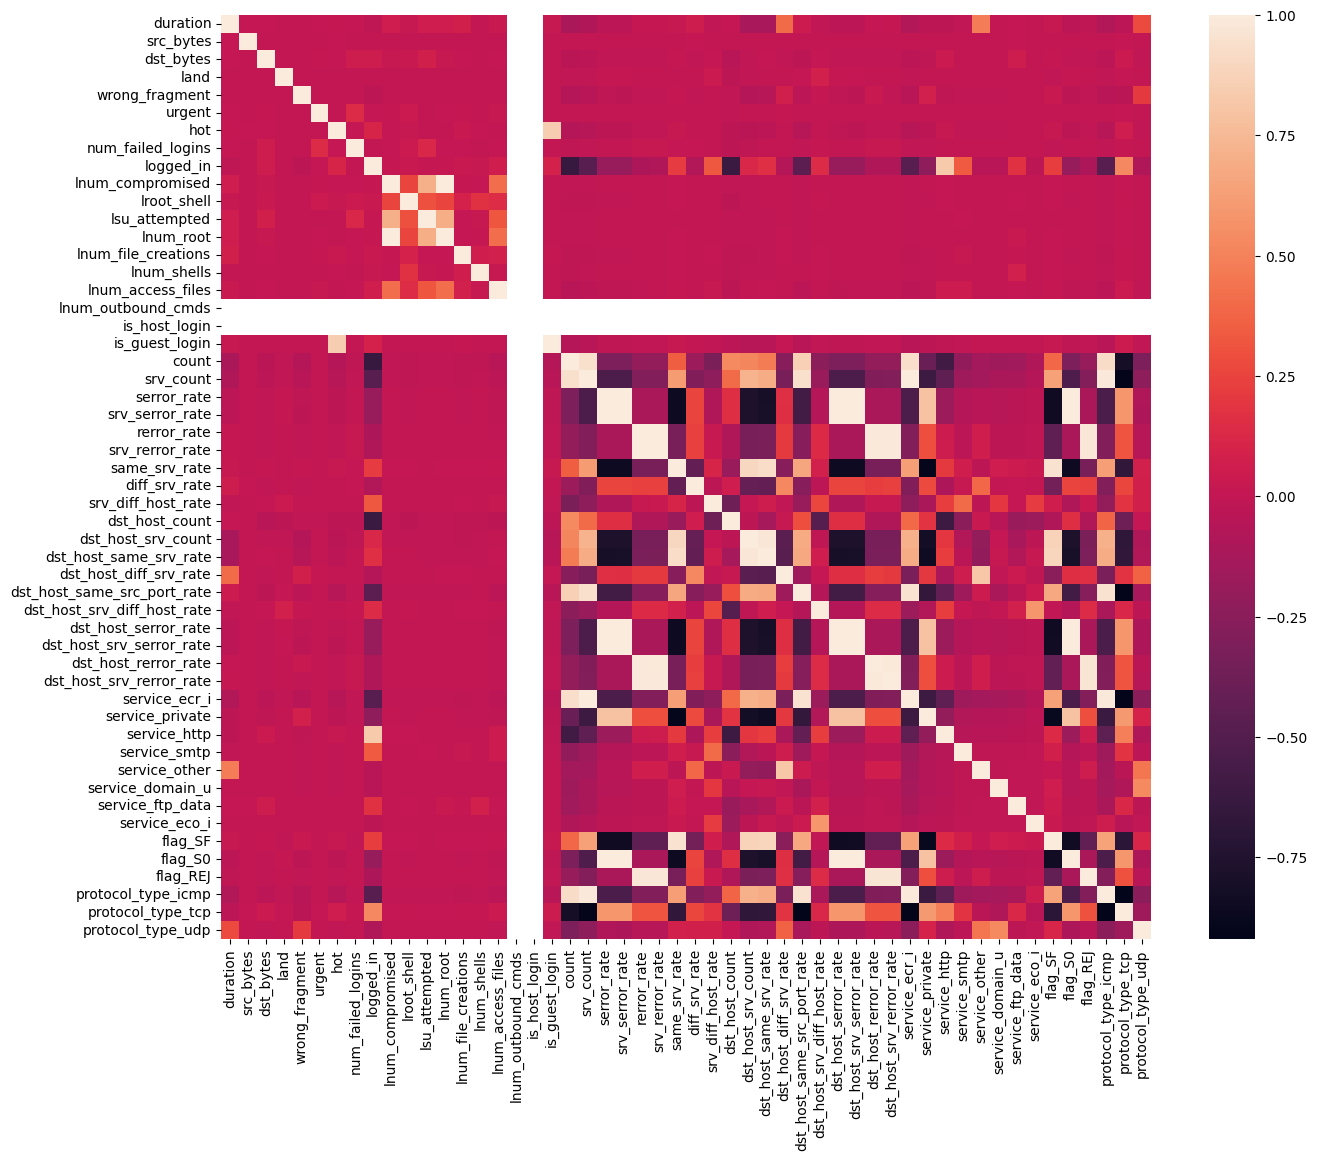

In [ ]:
corr = data.corr()
plt.figure(figsize =(15, 12))
sns.heatmap(corr)
plt.show()


In [ ]:
data.drop('lnum_root', axis = 1, inplace = True)
data.drop('srv_serror_rate', axis = 1, inplace = True)
data.drop('srv_rerror_rate', axis = 1, inplace = True)
data.drop('dst_host_srv_serror_rate', axis = 1, inplace = True)
data.drop('dst_host_serror_rate', axis = 1, inplace = True)
data.drop('dst_host_rerror_rate', axis = 1, inplace = True)
data.drop('dst_host_srv_rerror_rate', axis = 1, inplace = True)
data.drop('dst_host_same_srv_rate', axis = 1, inplace = True)
data.drop('is_host_login', axis = 1, inplace = True)
data

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,lnum_compromised,...,service_other,service_domain_u,service_ftp_data,service_eco_i,flag_SF,flag_S0,flag_REJ,protocol_type_icmp,protocol_type_tcp,protocol_type_udp
0,0,181,5450,0,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,1,0
1,0,239,486,0,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,1,0
2,0,235,1337,0,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,1,0
3,0,219,1337,0,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,1,0
4,0,217,2032,0,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
494015,0,310,1881,0,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,1,0
494016,0,282,2286,0,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,1,0
494017,0,203,1200,0,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,1,0
494018,0,291,1200,0,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,1,0


In [ ]:
attack_typee = {
    'normal' : 0,
    'u2r' : 1,
    'dos' : 2,
    'r2l' : 3,
    'probe' : 4
}
data['Attack Type'] = data['Attack Type'].map(attack_typee)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

y = data[['Attack Type']]
X = data.drop(['Attack Type' ], axis = 1)

sc = MinMaxScaler()
X = sc.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42)
print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(330993, 43) (163027, 43)
(330993, 1) (163027, 1)


In [ ]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators = 100)

# Training the model on the training dataset
# fit function is used to train the model using the training sets as parameters
y_train = np.ravel(y_train)
clf.fit(X_train, y_train)


# performing predictions on the test dataset
y_pred = clf.predict(X_test)

# metrics are used to find accuracy or error
from sklearn import metrics
print()

# using metrics module for accuracy calculation
print("ACCURACY OF THE MODEL: ", metrics.accuracy_score(y_test, y_pred))


ACCURACY OF THE MODEL:  0.9997301060560521


In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
print("TensorFlow version:", tf.__version__)

model = Sequential([
  Dense(128, activation= 'relu'),
  Dense(32, activation = 'relu'),
  Dense(5, activation = 'softmax')])

model.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    optimizer=tf.keras.optimizers.Adam(0.0001),
    metrics = 'accuracy'
)

model.fit(X_train,y_train,epochs=200)

TensorFlow version: 2.15.0
Epoch 1/200
10344/10344 [==============================] - 14s 1ms/step - loss: 0.0563 - accuracy: 0.9852
Epoch 2/200
10344/10344 [==============================] - 13s 1ms/step - loss: 0.0131 - accuracy: 0.9953
Epoch 3/200
10344/10344 [==============================] - 13s 1ms/step - loss: 0.0064 - accuracy: 0.9988
Epoch 4/200
10344/10344 [==============================] - 13s 1ms/step - loss: 0.0043 - accuracy: 0.9991
Epoch 5/200
10344/10344 [==============================] - 13s 1ms/step - loss: 0.0037 - accuracy: 0.9991
Epoch 6/200
10344/10344 [==============================] - 13s 1ms/step - loss: 0.0034 - accuracy: 0.9992
Epoch 7/200
10344/10344 [==============================] - 13s 1ms/step - loss: 0.0031 - accuracy: 0.9992
Epoch 8/200
10344/10344 [==============================] - 13s 1ms/step - loss: 0.0029 - accuracy: 0.9993
Epoch 9/200
10344/10344 [==============================] - 13s 1ms/step - loss: 0.0028 - accuracy: 0.9993
Epoch 10/200
10344/

In [ ]:
evaluation  = model.evaluate(X_test, y_test, verbose = 2)
print(evaluation)

5095/5095 - 6s - loss: 0.0048 - accuracy: 0.9995 - 6s/epoch - 1ms/step
[0.004807757679373026, 0.9994908571243286]
